# **Título**

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./..')

from image_gen import GenerativeModel
from image_gen.diffusion import VarianceExploding, VariancePreserving, SubVariancePreserving
from image_gen.noise import LinearNoiseSchedule
from image_gen.samplers import EulerMaruyama

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

c:\Users\hecto\Desktop\Uni\AAUTO 3\Proyecto\examples\..\image_gen\base.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
schedule = LinearNoiseSchedule()
diffusion = VariancePreserving(schedule)
sampler = EulerMaruyama(diffusion)

model = GenerativeModel(
    diffusion=diffusion,
    sampler=sampler,
    noise_schedule=schedule,
    image_size=(32, 32)
)

NameError: name 'LinearNoiseSchedule' is not defined

In [ ]:
def get_cifar_dataset(batch_size=32):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Scale to [-1, 1]
    ])
    
    train_dataset = datasets.CIFAR10(
        root='./data', 
        train=True,
        download=True,
        transform=transform
    )
    
    return train_dataset

In [ ]:
dataset = get_cifar_dataset()

In [ ]:
model.train(dataset, epochs=15)
model.save('cifar10_15e_vp.pth')
# model.load('cifar10_15e_ve.pth')

In [ ]:
n_images = 4
samples = model.generate(n_images)

Generating:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
def show_images(images, n_images=4):
    images = images[:n_images]  # Select only the first n_images
    images = images.permute(0, 2, 3, 1).cpu().detach().numpy()
    images = (images + 1) / 2  # Scale from [-1,1] to [0,1]
    
    grid_size = int(np.sqrt(n_images))  # Ensure a square-like grid
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(4, 4))
    axes = axes.flatten()
    
    for idx, img in enumerate(images):
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def visualize_cifar_images(dataset, n_images=4):
    fig, axes = plt.subplots(int(np.sqrt(n_images)), int(np.sqrt(n_images)), figsize=(4, 4))
    axes = axes.flatten()
    
    for i in range(n_images):
        img, label = dataset[i]  # Get image and label
        img = img.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = (img + 1) / 2  # Rescale from [-1, 1] to [0, 1]
        
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

### Originales

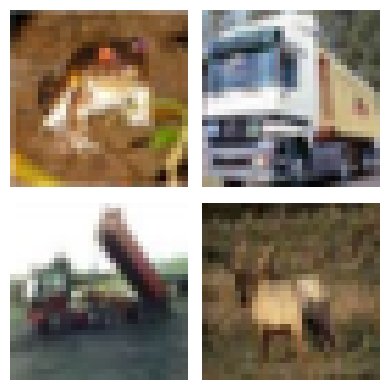

In [ ]:
visualize_cifar_images(dataset, n_images=n_images)

### Generadas

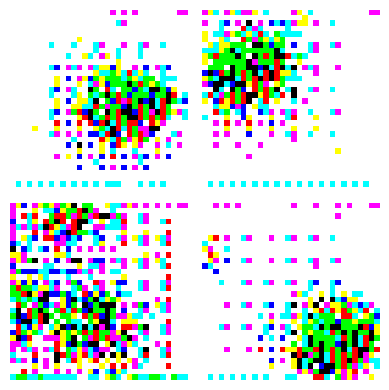

In [ ]:
show_images(samples)